## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
company = pd.read_csv('Company_Data.csv')
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


## EDA

###  Over view of Data

In [3]:
company.shape

(400, 11)

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


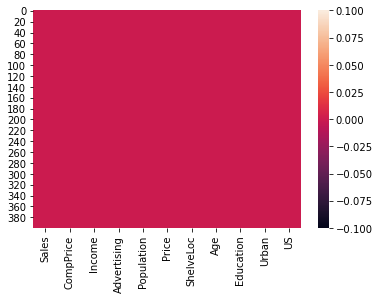

In [5]:
sns.heatmap(company.isnull())
plt.show()

* No null values found in the data.

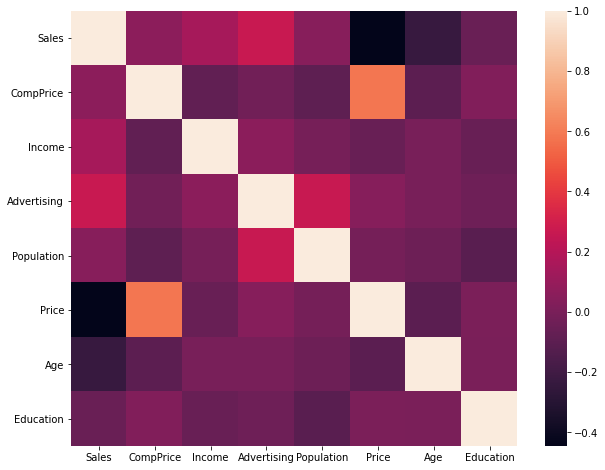

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(company.corr())
plt.show()

In [7]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


* No correlation found between the features.

In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


##### Here, mean of 'Sales' will be used to classify whether sale is high or low. Sale is high when 'Sales >=7.5'.

### Adding new column 'income'

In [9]:
company['sales'] = '<7.5'

### Converting the Sales variable to bucketing 

In [10]:
company.loc[company['Sales'] >= 7.5 , 'sales'] = 'High'
company.loc[company['Sales'] < 7.5 , 'sales'] = 'Low'
company.drop('Sales', axis =1, inplace=True)
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


### Encoding object data

#### Model.fit doesnt not consider String. So, we encode

In [11]:
label_en = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_en.fit_transform(company['ShelveLoc'])
company['Urban'] = label_en.fit_transform(company['Urban'])
company['US'] = label_en.fit_transform(company['US'])
company['sales'] = label_en.fit_transform(company['sales'])
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


### Finding outliers

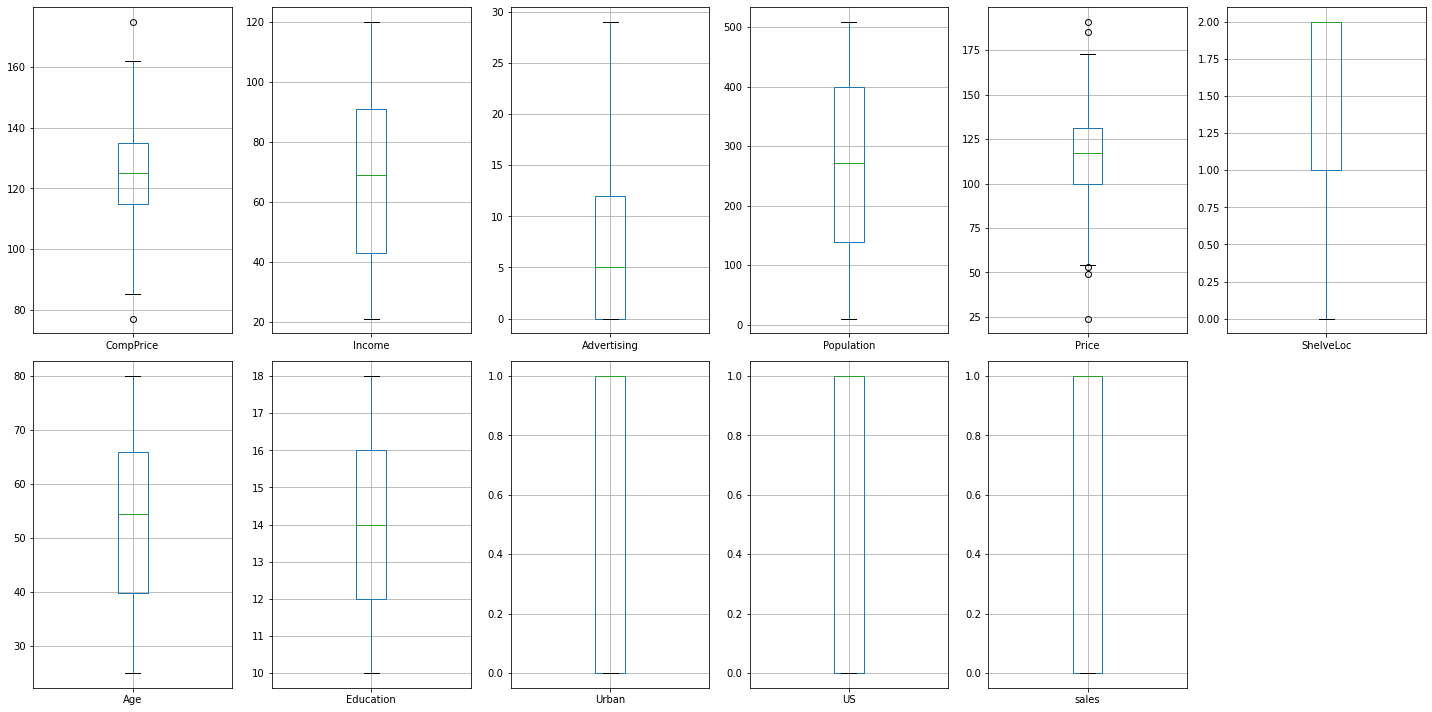

In [12]:
company.plot(kind='box', figsize=(20,10), layout=(2,6), subplots = True, grid = True)
plt.tight_layout()

##### There are some outliers in the dataset.
#### Using IQR, we are eliminating the outliers.

In [13]:
q1 = company.quantile(0.25)
q3 = company.quantile(0.75)
IQR = q3-q1
IQR

CompPrice       20.00
Income          48.25
Advertising     12.00
Population     259.50
Price           31.00
ShelveLoc        1.00
Age             26.25
Education        4.00
Urban            1.00
US               1.00
sales            1.00
dtype: float64

* Lower Bound :- (q1-1.5*IQR)
* Upper Bound :- (q3+1.5*IQR)
* The outliers are outside these bounds.

In [14]:
company_no_outliers = company[((company>=(q1-1.5*IQR)) & (company<=(q3+1.5*IQR))).all(axis=1)]
company_no_outliers.shape

(394, 11)

### Normalizing data

In [15]:
scaler = MinMaxScaler()
company_norm = pd.DataFrame(scaler.fit_transform(company_no_outliers), columns=company_no_outliers.columns)
company_norm

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.688312,0.525253,0.423077,0.533066,0.554622,0.0,0.309091,0.875,1.0,1.0,0.0
1,0.337662,0.272727,0.615385,0.501002,0.243697,0.5,0.727273,0.000,1.0,1.0,0.0
2,0.363636,0.141414,0.384615,0.519038,0.218487,1.0,0.618182,0.250,1.0,1.0,0.0
3,0.415584,0.797980,0.153846,0.913828,0.361345,1.0,0.545455,0.500,1.0,1.0,1.0
4,0.727273,0.434343,0.115385,0.661323,0.621849,0.0,0.236364,0.375,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
389,0.688312,0.878788,0.653846,0.386774,0.621849,0.5,0.145455,0.500,1.0,1.0,0.0
390,0.701299,0.020202,0.115385,0.054108,0.554622,1.0,0.545455,0.125,0.0,1.0,1.0
391,1.000000,0.050505,0.461538,0.717435,0.882353,1.0,0.272727,1.000,1.0,1.0,1.0
392,0.194805,0.585859,0.269231,0.549098,0.344538,0.0,0.454545,0.250,1.0,1.0,1.0


### Splitting Dataset into features & labels

In [16]:
x = company_norm.iloc[:,:-1]
y = company_norm.iloc[:,-1]

In [17]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.688312,0.525253,0.423077,0.533066,0.554622,0.0,0.309091,0.875,1.0,1.0
1,0.337662,0.272727,0.615385,0.501002,0.243697,0.5,0.727273,0.000,1.0,1.0
2,0.363636,0.141414,0.384615,0.519038,0.218487,1.0,0.618182,0.250,1.0,1.0
3,0.415584,0.797980,0.153846,0.913828,0.361345,1.0,0.545455,0.500,1.0,1.0
4,0.727273,0.434343,0.115385,0.661323,0.621849,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
389,0.688312,0.878788,0.653846,0.386774,0.621849,0.5,0.145455,0.500,1.0,1.0
390,0.701299,0.020202,0.115385,0.054108,0.554622,1.0,0.545455,0.125,0.0,1.0
391,1.000000,0.050505,0.461538,0.717435,0.882353,1.0,0.272727,1.000,1.0,1.0
392,0.194805,0.585859,0.269231,0.549098,0.344538,0.0,0.454545,0.250,1.0,1.0


### Train-test split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40, stratify=y)

In [19]:
y_train.value_counts()

1.0    159
0.0    156
Name: sales, dtype: int64

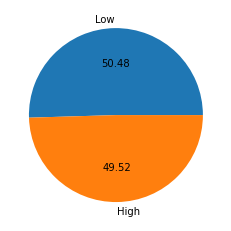

In [20]:
plt.pie(y_train.value_counts(), autopct='%0.2f', labels=['Low', 'High'], data=y_train)
plt.show()

## Building Random Forest Model

In [21]:
model = RandomForestClassifier(n_estimators=50, random_state=40)
criterion = ['entropy','gini']
max_depth = range(1, 10)
kfold = KFold(n_splits=10)
params = [{'criterion': criterion, 'max_depth':max_depth}]
grid_search = GridSearchCV(estimator=model, param_grid=params, cv = kfold)
grid_search.fit(x_train, y_train)
print('Best parameter : ', grid_search.best_params_)
print('Best score     : ', grid_search.best_score_)

Best parameter :  {'criterion': 'entropy', 'max_depth': 9}
Best score     :  0.7881048387096774


### Building Final model

In [22]:
model_final = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=9, random_state=40)
model_final.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=50,
                       random_state=40)

### Model Evaluation with trained data

In [23]:
y_train_pred = model_final.predict(x_train)

In [24]:
print('Accuracy score of Trained data: ', round(accuracy_score(y_train, y_train_pred),4) * 100 )

Accuracy score of Trained data:  99.68


In [25]:
print(confusion_matrix(y_train, y_train_pred))

[[156   0]
 [  1 158]]


In [26]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       156
         1.0       1.00      0.99      1.00       159

    accuracy                           1.00       315
   macro avg       1.00      1.00      1.00       315
weighted avg       1.00      1.00      1.00       315



### Model Evaluation with trained data

In [27]:
y_test_pred = model_final.predict(x_test)

In [28]:
print('Accuracy score of Test data: ', 100*round(accuracy_score(y_test, y_test_pred),4) )

Accuracy score of Test data:  83.54


In [29]:
print(confusion_matrix(y_test, y_test_pred))

[[34  5]
 [ 8 32]]


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        39
         1.0       0.86      0.80      0.83        40

    accuracy                           0.84        79
   macro avg       0.84      0.84      0.84        79
weighted avg       0.84      0.84      0.84        79



## Conclusion :

* Accuracy score, recall values & precision of the final model is high enough to deploy in the actual production. 